In [5]:
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
from shapely.geometry import Point

### Extract data as CSV

In [30]:
# server = 'https://webservices.volcano.si.edu/geoserver/GVP-VOTW/ows?'
# query = 'service=WFS&version=2.0.0&request=GetFeature&typeName=GVP-VOTW:Smithsonian_VOTW_Holocene_Volcanoes&outputFormat=csv'
# df = pd.read_csv(server+query)
# print(type(df))
# df.head()

<class 'pandas.core.frame.DataFrame'>


FID  Volcano_Number  \
0  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          210010   
1  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          210020   
2  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          210030   
3  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          210040   
4  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          211004   

                Volcano_Name Primary_Volcano_Type  Last_Eruption_Year  \
0  West Eifel Volcanic Field       Volcanic field             -8300.0   
1            Chaine des Puys         Lava dome(s)             -4040.0   
2        Olot Volcanic Field       Volcanic field                 NaN   
3   Calatrava Volcanic Field       Volcanic field             -3600.0   
4               Colli Albani              Caldera                 NaN   

   Country                                 Geological_Summary  \
0  Germany  The West Eifel Volcanic Field of western Germa...   
1   France  The Chaîne des Puys, prominent in the history ...   
2    Spain  The Olot volcanic field (also known as the Gar...   
3    Spain  The Calatrava volcanic field lies in central S...   
4    Italy  The Colli Albani (Alban Hills) complex immedia...   

                           Region       Subregion  Latitude  Longitude  \
0  Mediterranean and Western Asia  Western Europe    50.170       6.85   
1  Mediterranean and Western Asia  Western Europe    45.775       2.97   
2  Mediterranean and Western Asia  Western Europe    42.170       2.53   
3  Mediterranean and Western Asia  Western Europe    38.870      -4.02   
4  Mediterranean and Western Asia           Italy    41.730      12.70   

   Elevation                               Tectonic_Setting Geologic_Epoch  \
0        600        Rift zone / Continental crust (> 25 km)       Holocene   
1       1464        Rift zone / Continental crust (> 25 km)       Holocene   
2        893       Intraplate / Continental crust (> 25 km)       Holocene   
3       1117       Intraplate / Continental crust (> 25 km)       Holocene   
4        949  Subduction zone / Continental crust (> 25 km)       Holocene   

    Evidence_Category                                 Primary_Photo_Link  \
0      Eruption Dated  https://volcano.si.edu/gallery/photos/GVP-0150...   
1      Eruption Dated  https://volcano.si.edu/gallery/photos/GVP-0880...   
2   Evidence Credible  https://volcano.si.edu/gallery/photos/GVP-1199...   
3      Eruption Dated  https://volcano.si.edu/gallery/photos/GVP-1185...   
4  Evidence Uncertain  https://volcano.si.edu/gallery/photos/GVP-0881...   

                               Primary_Photo_Caption  \
0  The lake-filled Weinfelder maar is one of abou...   
1  The central part of the Chaîne des Puys volcan...   
2  The forested Volcà Montolivet scoria cone rise...   
3  Columba volcano, the youngest known vent of th...   
4  The lake-filled Albano maar is part of the Alb...   

                                Primary_Photo_Credit  \
0  Photo by Richard Waitt, 1990 (U.S. Geological ...   
1       Photo by Ichio Moriya (Kanazawa University).   
2            Photo by Puigalder (Wikimedia Commons).   
3  Photo by Rafael Becerra Ramírez, 2006 (Univers...   
4       Photo by Ichio Moriya (Kanazawa University).   

                    Major_Rock_Type          GeoLocation  
0                           Foidite   POINT (50.17 6.85)  
1             Basalt / Picro-Basalt  POINT (45.775 2.97)  
2  Trachybasalt / Tephrite Basanite   POINT (42.17 2.53)  
3             Basalt / Picro-Basalt  POINT (38.87 -4.02)  
4                           Foidite   POINT (41.73 12.7)

## Extract data as JSON

In [3]:
server = 'https://webservices.volcano.si.edu/geoserver/GVP-VOTW/ows?'
query = 'service=WFS&version=2.0.0&request=GetFeature&typeName=GVP-VOTW:Smithsonian_VOTW_Holocene_Volcanoes&outputFormat=json'

In [4]:
gf = gpd.read_file(server+query)
print(type(gf))
gf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


id  Volcano_Number  \
0  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          210010   
1  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          210020   
2  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          210030   
3  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          210040   
4  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          211004   

                Volcano_Name Primary_Volcano_Type  Last_Eruption_Year  \
0  West Eifel Volcanic Field       Volcanic field             -8300.0   
1            Chaine des Puys         Lava dome(s)             -4040.0   
2        Olot Volcanic Field       Volcanic field                 NaN   
3   Calatrava Volcanic Field       Volcanic field             -3600.0   
4               Colli Albani              Caldera                 NaN   

   Country                                 Geological_Summary  \
0  Germany  The West Eifel Volcanic Field of western Germa...   
1   France  The Chaîne des Puys, prominent in the history ...   
2    Spain  The Olot volcanic field (also known as the Gar...   
3    Spain  The Calatrava volcanic field lies in central S...   
4    Italy  The Colli Albani (Alban Hills) complex immedia...   

                           Region       Subregion  Latitude  Longitude  \
0  Mediterranean and Western Asia  Western Europe    50.170       6.85   
1  Mediterranean and Western Asia  Western Europe    45.775       2.97   
2  Mediterranean and Western Asia  Western Europe    42.170       2.53   
3  Mediterranean and Western Asia  Western Europe    38.870      -4.02   
4  Mediterranean and Western Asia           Italy    41.730      12.70   

   Elevation                               Tectonic_Setting Geologic_Epoch  \
0        600        Rift zone / Continental crust (> 25 km)       Holocene   
1       1464        Rift zone / Continental crust (> 25 km)       Holocene   
2        893       Intraplate / Continental crust (> 25 km)       Holocene   
3       1117       Intraplate / Continental crust (> 25 km)       Holocene   
4        949  Subduction zone / Continental crust (> 25 km)       Holocene   

    Evidence_Category                                 Primary_Photo_Link  \
0      Eruption Dated  https://volcano.si.edu/gallery/photos/GVP-0150...   
1      Eruption Dated  https://volcano.si.edu/gallery/photos/GVP-0880...   
2   Evidence Credible  https://volcano.si.edu/gallery/photos/GVP-1199...   
3      Eruption Dated  https://volcano.si.edu/gallery/photos/GVP-1185...   
4  Evidence Uncertain  https://volcano.si.edu/gallery/photos/GVP-0881...   

                               Primary_Photo_Caption  \
0  The lake-filled Weinfelder maar is one of abou...   
1  The central part of the Chaîne des Puys volcan...   
2  The forested Volcà Montolivet scoria cone rise...   
3  Columba volcano, the youngest known vent of th...   
4  The lake-filled Albano maar is part of the Alb...   

                                Primary_Photo_Credit  \
0  Photo by Richard Waitt, 1990 (U.S. Geological ...   
1       Photo by Ichio Moriya (Kanazawa University).   
2            Photo by Puigalder (Wikimedia Commons).   
3  Photo by Rafael Becerra Ramírez, 2006 (Univers...   
4       Photo by Ichio Moriya (Kanazawa University).   

                    Major_Rock_Type                   geometry  
0                           Foidite   POINT (6.85000 50.17000)  
1             Basalt / Picro-Basalt   POINT (2.97000 45.77500)  
2  Trachybasalt / Tephrite Basanite   POINT (2.53000 42.17000)  
3             Basalt / Picro-Basalt  POINT (-4.02000 38.87000)  
4                           Foidite  POINT (12.70000 41.73000)

In [5]:
gf.groupby("Country").count()

id  Volcano_Number  Volcano_Name  Primary_Volcano_Type  \
Country                                                                       
Algeria               3               3             3                     3   
Antarctica           19              19            19                    19   
Argentina            17              17            17                    17   
Armenia               3               3             3                     3   
Armenia-Azerbaijan    2               2             2                     2   
...                 ...             ...           ...                   ...   
United Kingdom       13              13            13                    13   
United States       162             162           162                   162   
Vanuatu              15              15            15                    15   
Vietnam               2               2             2                     2   
Yemen                11              11            11                    11   

                    Last_Eruption_Year  Geological_Summary  Region  Subregion  \
Country                                                                         
Algeria                              0                   3       3          3   
Antarctica                           9                  19      19         19   
Argentina                            5                  17      17         17   
Armenia                              2                   3       3          3   
Armenia-Azerbaijan                   2                   2       2          2   
...                                ...                 ...     ...        ...   
United Kingdom                      11                  13      13         13   
United States                      120                 162     162        162   
Vanuatu                             10                  15      15         15   
Vietnam                              1                   2       2          2   
Yemen                                5                  11      11         11   

                    Latitude  Longitude  Elevation  Tectonic_Setting  \
Country                                                                
Algeria                    3          3          3                 3   
Antarctica                19         19         19                19   
Argentina                 17         17         17                17   
Armenia                    3          3          3                 3   
Armenia-Azerbaijan         2          2          2                 2   
...                      ...        ...        ...               ...   
United Kingdom            13         13         13                13   
United States            162        162        162               162   
Vanuatu                   15         15         15                15   
Vietnam                    2          2          2                 2   
Yemen                     11         11         11                11   

                    Geologic_Epoch  Evidence_Category  Primary_Photo_Link  \
Country                                                                     
Algeria                          3                  3                   3   
Antarctica                      19                 19                  16   
Argentina                       17                 17                  16   
Armenia                          3                  3                   3   
Armenia-Azerbaijan               2                  2                   2   
...                            ...                ...                 ...   
United Kingdom                  13                 13                  12   
United States                  162                162                 157   
Vanuatu                         15                 15                  14   
Vietnam                          2                  2                   0   
Yemen                           11                 11                  10   



In [6]:
Ecuador = gf[gf["Country"] == 'Ecuador'] 

In [7]:
Ecuador

id  Volcano_Number  \
1040  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          352001   
1041  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          352002   
1042  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          352003   
1043  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          352004   
1044  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          352005   
1045  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          352006   
1046  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          352011   
1047  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          352010   
1048  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          352021   
1049  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          352022   
1050  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          352020   
1051  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          352031   
1052  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          352030   
1053  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          352041   
1054  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          352040   
1055  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          352050   
1056  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          352060   
1057  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          352071   
1058  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          352081   
1059  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          352080   
1060  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          352090   
1061  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          353011   
1062  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          353010   
1063  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          353020   
1064  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          353030   
1065  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          353040   
1066  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          353050   
1067  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          353060   
1068  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          353070   
1069  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          353081   
1070  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          353080   
1071  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          353091   
1072  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          353090   
1073  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          353120   

          Volcano_Name Primary_Volcano_Type  Last_Eruption_Year  Country  \
1040             Soche        Stratovolcano             -6650.0  Ecuador   
1041       Chachimbiro        Stratovolcano             -3740.0  Ecuador   
1042          Cuicocha              Caldera               650.0  Ecuador   
1043          Imbabura             Compound             -5550.0  Ecuador   
1044           Mojanda    Stratovolcano(es)                 NaN  Ecuador   
1045           Cayambe             Compound              1786.0  Ecuador   
1046         Pululahua              Caldera               290.0  Ecuador   
1047        Reventador        Stratovolcano              2022.0  Ecuador   
1048           Atacazo        Stratovolcano              -320.0  Ecuador   
1049           Chacana              Caldera              1773.0  Ecuador   
1050  Guagua Pichincha        Stratovolcano              2002.0  Ecuador   
1051             Aliso        Stratovolcano             -2450.0  Ecuador   
1052          Antisana        Stratovolcano              1802.0  Ecuador   
1053          Illiniza        Stratovolcano                 NaN  Ecuador   
1054            Sumaco        Stratovolcano              1895.0  Ecuador   
1055          Cotopaxi        Stratovolcano              2022.0  Ecuador   
1056          Quilotoa              Caldera              1280.0  Ecuador   
1057        Chimborazo        Stratovolcano               5

In [8]:
ecu_volcan = Ecuador.reset_index()

In [9]:
ecu_volcan.drop('index', axis=1, inplace=True)

In [10]:
ecu_volcan.Volcano_Name.count()

34

In [11]:
ecu_volcan[ecu_volcan["Volcano_Name"] == 'Cotopaxi'] 

id  Volcano_Number  \
15  Smithsonian_VOTW_Holocene_Volcanoes.fid-6ec5dc...          352050   

   Volcano_Name Primary_Volcano_Type  Last_Eruption_Year  Country  \
15     Cotopaxi        Stratovolcano              2022.0  Ecuador   

                                   Geological_Summary         Region  \
15  The symmetrical, glacier-covered, Cotopaxi str...  South America   

   Subregion  Latitude  Longitude  Elevation  \
15   Ecuador    -0.677    -78.436       5911   

                                 Tectonic_Setting Geologic_Epoch  \
15  Subduction zone / Continental crust (> 25 km)       Holocene   

    Evidence_Category                                 Primary_Photo_Link  \
15  Eruption Observed  https://volcano.si.edu/gallery/photos/GVP-0445...   

                                Primary_Photo_Caption  \
15  Symmetrical Cotopaxi is one of the most promin...   

                                 Primary_Photo_Credit  \
15  Photo by Lee Siebert, 1978 (Smithsonian Instit...   

                 Major_Rock_Type                    geometry  
15  Andesite / Basaltic Andesite  POINT (-78.43600 -0.67700)

## Basemap + Geopandas

In [13]:
from sentinelhub import (
    CRS,
    BBox,
    BBoxSplitter,
    CustomGridSplitter,
    DataCollection,
    MimeType,
    MosaickingOrder,
    OsmSplitter,
    SentinelHubDownloadClient,
    SentinelHubRequest,
    TileSplitter,
    UtmGridSplitter,
    UtmZoneSplitter,
    read_data,
)
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [14]:
INPUT_FILE = "ecua-geojson.json"

geo_json = read_data(INPUT_FILE)

In [15]:
geo_json

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': 'sb978rn7613.1',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-80.2076416, -3.43513894],
       [-80.2076416, -3.43541694],
       [-80.20735931, -3.43541694],
       [-80.20735931, -3.43569493],
       [-80.20680237, -3.43569493],
       [-80.20680237, -3.43597102],
       [-80.20625305, -3.43597102],
       [-80.20625305, -3.43624902],
       [-80.20652771, -3.43624902],
       [-80.20652771, -3.43652701],
       [-80.20680237, -3.43652701],
       [-80.20680237, -3.43680501],
       [-80.20652771, -3.43680501],
       [-80.20652771, -3.43708301],
       [-80.20735931, -3.43708301],
       [-80.20735931, -3.43680501],
       [-80.20847321, -3.43680501],
       [-80.20847321, -3.43652701],
       [-80.20874786, -3.43652701],
       [-80.20874786, -3.43597102],
       [-80.20930481, -3.43597102],
       [-80.20930481, -3.43624902],
       [-80.20976257, -3.43624902],
       [-80.20986176, -3.4362

In [193]:
ecu_shapefile = gpd.read_file(r'ecu_regions.geojson')

In [194]:
ecu_shapefile

id                            name  density  \
0   11192                           Azuay        0   
1   11186                         Bolívar        0   
2   11191                           Cañar        0   
3   11178                          Carchi        0   
4   11188                      Chimborazo        0   
5   11196                        Cotopaxi        0   
6   11182                          El Oro        0   
7   11194                      Esmeraldas        0   
8   11176              Galápagos Province        0   
9   11190                          Guayas        0   
10  11179                        Imbabura        0   
11  11177                            Loja        0   
12  11195                        Los Ríos        0   
13  11193                          Manabí        0   
14  11199                 Morona Santiago        0   
15  11184                            Napo        0   
16  11183                        Orellana        0   
17  11185                         Pastaza        0   
18  11187                       Pichincha        0   
19  11189            Santa Elena Province        0   
20  11197  Santo Domingo de los Tsáchilas        0   
21  11181                       Sucumbíos        0   
22  11180                      Tungurahua        0   
23  11198                Zamora Chinchipe        0   

                                             path  \
0                            /world/Ecuador/Azuay   
1                          /world/Ecuador/Bolívar   
2                            /world/Ecuador/Cañar   
3                           /world/Ecuador/Carchi   
4                       /world/Ecuador/Chimborazo   
5                         /world/Ecuador/Cotopaxi   
6                           /world/Ecuador/El Oro   
7                       /world/Ecuador/Esmeraldas   
8               /world/Ecuador/Galápagos Province   
9                           /world/Ecuador/Guayas   
10                        /world/Ecuador/Imbabura   
11                            /world/Ecuador/Loja   
12                        /world/Ecuador/Los Ríos   
13                          /world/Ecuador/Manabí   
14                 /world/Ecuador/Morona Santiago   
15                            /world/Ecuador/Napo   
16                        /world/Ecuador/Orellana   
17                         /world/Ecuador/Pastaza   
18                       /world/Ecuador/Pichincha   
19            /world/Ecuador/Santa Elena Province   
20  /world/Ecuador/Santo Domingo de los Tsáchilas   
21                       /world/Ecuador/Sucumbíos   
22                      /world/Ecuador/Tungurahua   
23                /world/Ecuador/Zamora Chinchipe   

                                             geometry  
0   MULTIPOLYGON (((-78.42359 -2.63094, -78.42438 ...  
1   MULTIPOLYGON (((-78.84405 -1.66148, -78.84527 ...  
2   MULTIPOLYGON (((-78.56794 -2.55694, -78.56992 ...  
3   MULTIPOLYGON (((-77.52777 0.64174, -77.53217 0...  
4   MULTIPOLYGON (((-78.35854 -1.52093, -78.35925 ...  
5   MULTIPOLYGON (((-78.38093 -0.81640, -78.38172 ...  
6   MULTIPOLYGON (((-79.36539 -3.65916, -79.36701 ...  
7   MULTIPOLYGON (((-78.42754 0.58121, -78.42919 0...  
8   MULTIPOLYGON (((-89.03787 -0.71827, -89.03887 ...  
9   MULTIPOLYGON (((-79.10294 -2.13389, -79.10343 ...  
10  MULTIPOLYGON (((-77.81157 0.35502, -77.81256 0...  
11  MULTIPOLYGON (((-79.10069 -4.20876, -79.10198 ...  
12  MULTIPOLYGON (((-79.08156 -0.56474, -79.08243 ...  
13  MULTIPOLYGON (((-79.40194 -0.39157, -79.40259 ...  
14  MULTIPOLYGON (((-76.69277 -2.60895, -76.86411 ...  
15  MULTIPOLYGON (((-77.02701 -0.92207, -77.02727 ...  
16  MULTIPOLYGON (((-75.19496 -0.97038, -75.22002 ...  
17  MULTIPOLYGON (((-75.58499 -1.54962, -75.58667 ...  
18  MULTIPOLYGON (((-77.83986 0.02749, -77.84066 0...  
19  MULTIPOLYGON (((-80.22824 -2.22519, -80.22881 ...  
20  MULTIPOLYGON (((-78.74813 -0.27094, -78.74869 ...  
21  MULTIPOLYGON (((-75.22298 -0.62826, -75.22325 ...  
22  MULTIPOLYGON (((-78.11305 -1.28466, -7

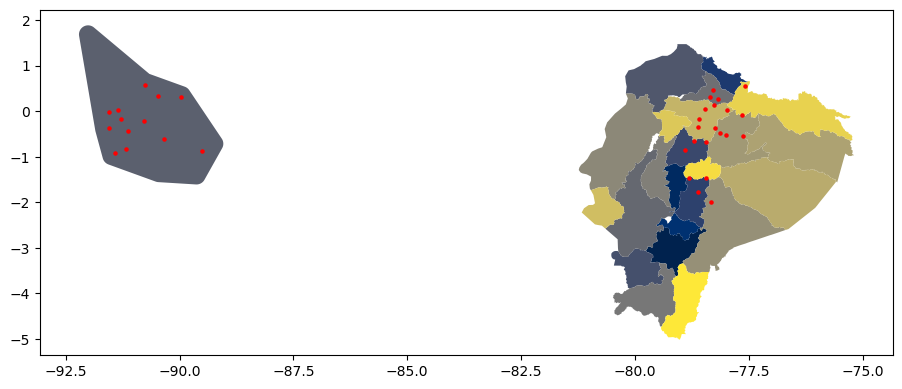

In [197]:
fig, ax = plt.subplots(figsize=(11,7))

ecu_shapefile.plot(ax=ax,cmap="cividis")

ecu_volcan.plot(ax=ax, color='red', markersize=5);

In [22]:
import hvplot.pandas
import hvplot.xarray

In [85]:
ecu_volcan.hvplot.points('Longitude', 'Latitude', geo=True, color='red',
                       xlim=(-95,-70), ylim=(-8, 4), tiles='ESRI')

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]

In [179]:
%matplotlib inline

import itertools
import tempfile
from pathlib import Path

import numpy as np
from shapely.geometry import MultiLineString, MultiPolygon, Polygon, box, shape

from sentinelhub import (
    CRS,
    BBox,
    BBoxSplitter,
    CustomGridSplitter,
    DataCollection,
    MimeType,
    MosaickingOrder,
    OsmSplitter,
    SentinelHubDownloadClient,
    SentinelHubRequest,
    TileSplitter,
    UtmGridSplitter,
    UtmZoneSplitter,
    read_data,
)

import geopandas as gpd
import matplotlib.pyplot as plt
import rioxarray  # noqa: F401 # Its necesary for xarray.open_mfdataset() with engine `rasterio`
import xarray as xr  # It may need Dask library https://docs.dask.org/en/stable/install.html
from matplotlib.patches import Polygon as plt_polygon
from mpl_toolkits.basemap import Basemap  # Available here: https://github.com/matplotlib/basemap

In [176]:
INPUT_FILE = "ecua-geojson.json"

geo_json = read_data(INPUT_FILE)
ecuador_area = shape(geo_json["features"][0]["geometry"])

type(ecuador_area)

shapely.geometry.multipolygon.MultiPolygon

In [177]:
ecuador_area

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


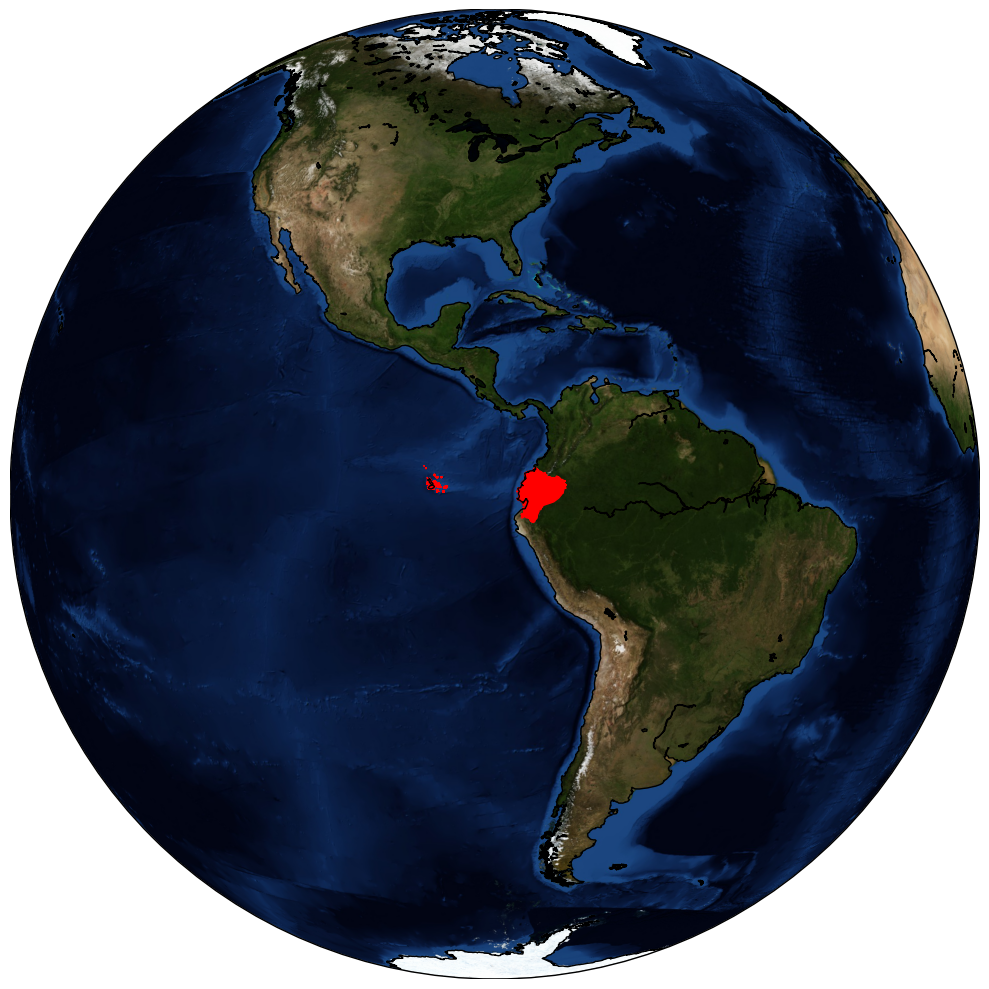

In [180]:
def show_area(area_shape, area_buffer=0.3):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)

    minx, miny, maxx, maxy = area_shape.bounds
    lng, lat = (minx + maxx) / 2, (miny + maxy) / 2

    m = Basemap(projection="ortho", lat_0=lat, lon_0=lng, resolution="l")
    m.drawcoastlines()
    m.bluemarble()

    if isinstance(area_shape, Polygon):
        polygon_iter = [area_shape]
    elif isinstance(area_shape, MultiPolygon):
        polygon_iter = area_shape.geoms
    else:
        raise ValueError(f"Geometry of type {type(area_shape)} is not supported")

    for polygon in polygon_iter:
        x, y = np.array(polygon.boundary.coords)[0]
        m_poly = []
        for x, y in np.array(polygon.boundary.coords):
            m_poly.append(m(x, y))
        ax.add_patch(plt_polygon(np.array(m_poly), closed=True, facecolor="red", edgecolor="red"))

    plt.tight_layout()
    plt.show()


show_area(ecuador_area)

In [182]:
bbox_splitter = BBoxSplitter(
    [ecuador_area], CRS.WGS84, (5, 4)
)  # bounding box will be split into grid of 5x4 bounding boxes

print("Area bounding box: {}\n".format(bbox_splitter.get_area_bbox().__repr__()))

bbox_list = bbox_splitter.get_bbox_list()
info_list = bbox_splitter.get_info_list()

print(
    "Each bounding box also has some info how it was created.\nExample:\nbbox: {}\ninfo: {}\n".format(
        bbox_list[0].__repr__(), info_list[0]
    )
)

Area bounding box: BBox(((-92.0089035, -5.01737499), (-75.20004272, 1.68154752)), crs=CRS('4326'))

Each bounding box also has some info how it was created.
Example:
bbox: BBox(((-92.0089035, -1.667913735), (-88.647131344, 0.006816892499999838)), crs=CRS('4326'))
info: {'parent_bbox': BBox(((-92.0089035, -5.01737499), (-75.20004272, 1.68154752)), crs=CRS('4326')), 'index_x': 0, 'index_y': 2}



In [184]:
geometry_list = bbox_splitter.get_geometry_list()
geometry_list 

In [189]:
def show_splitter(splitter, alpha=0.2, area_buffer=0.2, show_legend=False):
    area_bbox = splitter.get_area_bbox()
    minx, miny, maxx, maxy = area_bbox
    lng, lat = area_bbox.middle
    w, h = maxx - minx, maxy - miny
    minx = minx - area_buffer * w
    miny = miny - area_buffer * h
    maxx = maxx + area_buffer * w
    maxy = maxy + area_buffer * h

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)

    base_map = Basemap(
        projection="mill",
        lat_0=lat,
        lon_0=lng,
        llcrnrlon=minx,
        llcrnrlat=miny,
        urcrnrlon=maxx,
        urcrnrlat=maxy,
        resolution="l",
        epsg=4326,
    )
    base_map.drawcoastlines(color=(0, 0, 0, 0))

    area_shape = splitter.get_area_shape()

    if isinstance(area_shape, Polygon):
        polygon_iter = [area_shape]
    elif isinstance(area_shape, MultiPolygon):
        polygon_iter = area_shape.geoms
    else:
        raise ValueError(f"Geometry of type {type(area_shape)} is not supported")

    for polygon in polygon_iter:
        if isinstance(polygon.boundary, MultiLineString):
            for linestring in polygon.boundary:
                ax.add_patch(plt_polygon(np.array(linestring), closed=True, facecolor=(0, 0, 0, 0), edgecolor="red"))
        else:
            ax.add_patch(
                plt_polygon(np.array(polygon.boundary.coords), closed=True, facecolor=(0, 0, 0, 0), edgecolor="red")
            )

    bbox_list = splitter.get_bbox_list()
    info_list = splitter.get_info_list()

    cm = plt.get_cmap("jet", len(bbox_list))
    legend_shapes = []
    for i, (bbox, info) in enumerate(zip(bbox_list, info_list)):
        wgs84_bbox = bbox.transform(CRS.WGS84).get_polygon()

        tile_color = tuple(list(cm(i))[:3] + [alpha])
        ax.add_patch(plt_polygon(np.array(wgs84_bbox), closed=True, facecolor=tile_color, edgecolor="green"))

        if show_legend:
            legend_shapes.append(plt.Rectangle((0, 0), 1, 1, fc=cm(i)))

    if show_legend:
        legend_names = []
        for info in info_list:
            legend_name = "{},{}".format(info["index_x"], info["index_y"])

            for prop in ["grid_index", "tile"]:
                if prop in info:
                    legend_name = "{},{}".format(info[prop], legend_name)

            legend_names.append(legend_name)

        plt.legend(legend_shapes, legend_names)
    plt.tight_layout()
    plt.show()

## Sentinelhub Set up

In [ ]:
# from sentinelhub import SHConfig

# config = SHConfig()

# config.instance_id = '47ba9609-d691-4add-8b31-22f46dde63e8'
# config.sh_client_id = '7a24c8e7-a5d9-403f-94b8-65a5f24110a4'
# config.sh_client_secret = 'FQGJ6uy*#}/O./gv1G+DzU6;(Mxhpev.@,xd;!Us'

# config.save()

In [185]:
from sentinelhub import SHConfig

config = SHConfig()

if config.instance_id == "":
    print("Warning! To use WFS functionality, please configure the `instance_id`.")

In [312]:
tile_splitter = TileSplitter(
    [ecuador_area], CRS.WGS84, ("2017-10-01", "2017-11-01"), data_collection=DataCollection.SENTINEL2_L1C, config=config
)

tile_bbox_list = tile_splitter.get_bbox_list()


{'parent_bbox': BBox(((499980.0, 9590200.0), (609780.0, 9700000.0)), crs=CRS('32717')),
 'index_x': 0,
 'index_y': 0,
 'ids': ['S2B_MSIL1C_20171101T155209_N0206_R111_T17MNS_20171102T210132',
  'S2A_MSIL1C_20171024T153621_N0206_R068_T17MNS_20171024T185932',
  'S2B_MSIL1C_20171019T153609_N0205_R068_T17MNS_20171019T153652',
  'S2A_MSIL1C_20171017T155221_N0205_R111_T17MNS_20171017T155220',
  'S2B_MSIL1C_20171012T155209_N0205_R111_T17MNS_20171012T155207',
  'S2A_MSIL1C_20171004T153621_N0205_R068_T17MNS_20171004T154144'],
 'timestamps': [datetime.datetime(2017, 11, 1, 15, 52, 8, tzinfo=tzutc()),
  datetime.datetime(2017, 10, 24, 15, 36, 18, tzinfo=tzutc()),
  datetime.datetime(2017, 10, 19, 15, 36, 52, tzinfo=tzutc()),
  datetime.datetime(2017, 10, 17, 15, 52, 20, tzinfo=tzutc()),
  datetime.datetime(2017, 10, 12, 15, 52, 7, tzinfo=tzutc()),
  datetime.datetime(2017, 10, 4, 15, 41, 44, tzinfo=tzutc())]}

In [313]:
len(tile_bbox_list)

57

In [292]:

print(tile_splitter.get_info_list()[0])

{'parent_bbox': BBox(((499980.0, 9590200.0), (609780.0, 9700000.0)), crs=CRS('32717')), 'index_x': 0, 'index_y': 0, 'ids': ['S2B_MSIL1C_20171101T155209_N0206_R111_T17MNS_20171102T210132', 'S2A_MSIL1C_20171024T153621_N0206_R068_T17MNS_20171024T185932', 'S2B_MSIL1C_20171019T153609_N0205_R068_T17MNS_20171019T153652', 'S2A_MSIL1C_20171017T155221_N0205_R111_T17MNS_20171017T155220', 'S2B_MSIL1C_20171012T155209_N0205_R111_T17MNS_20171012T155207', 'S2A_MSIL1C_20171004T153621_N0205_R068_T17MNS_20171004T154144'], 'timestamps': [datetime.datetime(2017, 11, 1, 15, 52, 8, tzinfo=tzutc()), datetime.datetime(2017, 10, 24, 15, 36, 18, tzinfo=tzutc()), datetime.datetime(2017, 10, 19, 15, 36, 52, tzinfo=tzutc()), datetime.datetime(2017, 10, 17, 15, 52, 20, tzinfo=tzutc()), datetime.datetime(2017, 10, 12, 15, 52, 7, tzinfo=tzutc()), datetime.datetime(2017, 10, 4, 15, 41, 44, tzinfo=tzutc())]}


In [294]:
tile_splitter.get_info_list()

[{'parent_bbox': BBox(((499980.0, 9590200.0), (609780.0, 9700000.0)), crs=CRS('32717')),
  'index_x': 0,
  'index_y': 0,
  'ids': ['S2B_MSIL1C_20171101T155209_N0206_R111_T17MNS_20171102T210132',
   'S2A_MSIL1C_20171024T153621_N0206_R068_T17MNS_20171024T185932',
   'S2B_MSIL1C_20171019T153609_N0205_R068_T17MNS_20171019T153652',
   'S2A_MSIL1C_20171017T155221_N0205_R111_T17MNS_20171017T155220',
   'S2B_MSIL1C_20171012T155209_N0205_R111_T17MNS_20171012T155207',
   'S2A_MSIL1C_20171004T153621_N0205_R068_T17MNS_20171004T154144'],
  'timestamps': [datetime.datetime(2017, 11, 1, 15, 52, 8, tzinfo=tzutc()),
   datetime.datetime(2017, 10, 24, 15, 36, 18, tzinfo=tzutc()),
   datetime.datetime(2017, 10, 19, 15, 36, 52, tzinfo=tzutc()),
   datetime.datetime(2017, 10, 17, 15, 52, 20, tzinfo=tzutc()),
   datetime.datetime(2017, 10, 12, 15, 52, 7, tzinfo=tzutc()),
   datetime.datetime(2017, 10, 4, 15, 41, 44, tzinfo=tzutc())]},
 {'parent_bbox': BBox(((499980.0, 9490240.0), (609780.0, 9600040.0)), crs

In [281]:
for tile_info in tile_bbox_list:
    print(tile_info)

499980.0,9590200.0,609780.0,9700000.0
499980.0,9490240.0,609780.0,9600040.0
499980.0,-9780.0,609780.0,100020.0
499980.0,90240.0,609780.0,200040.0
600000.0,9790240.0,709800.0,9900040.0
499980.0,9790240.0,609780.0,9900040.0
600000.0,9590200.0,709800.0,9700000.0
399960.0,9690220.0,509760.0,9800020.0
399960.0,9790240.0,509760.0,9900040.0
600000.0,-9780.0,709800.0,100020.0
600000.0,9690220.0,709800.0,9800020.0
499980.0,9690220.0,609780.0,9800020.0
499980.0,9890200.0,609780.0,10000000.0
600000.0,90240.0,709800.0,200040.0
600000.0,9890200.0,709800.0,10000000.0
699960.0,90240.0,809760.0,200040.0
199980.0,9790240.0,309780.0,9900040.0
799980.0,9790240.0,909780.0,9900040.0
199980.0,9890200.0,309780.0,10000000.0
799980.0,-9780.0,909780.0,100020.0
799980.0,9890200.0,909780.0,10000000.0
199980.0,9790240.0,309780.0,9900040.0
199980.0,-9780.0,309780.0,100020.0
300000.0,9790240.0,409800.0,9900040.0
399960.0,-9780.0,509760.0,100020.0
399960.0,9790240.0,509760.0,9900040.0
799980.0,9790240.0,909780.0,9900

In [288]:
tile_splitter.get_bbox_list(crs=CRS.WGS84)[0]

BBox(((-81.00018010938248, -3.7075372323088565), (-80.01238363602222, -2.713768419181371)), crs=CRS('4326'))

### List bbox Ecuador

In [289]:
tile_splitter.get_bbox_list(crs=CRS.WGS84)

[BBox(((-81.00018010938248, -3.7075372323088565), (-80.01238363602222, -2.713768419181371)), crs=CRS('4326')),
 BBox(((-81.00018031487441, -4.611858741387968), (-80.01152683630363, -3.61797465397612)), crs=CRS('4326')),
 BBox(((-81.0001797351637, -0.08848272723993329), (-80.01336172716991, 0.9047765147707161)), crs=CRS('4326')),
 BBox(((-81.0001797530773, 0.8164290330744097), (-80.01299496617456, 1.8095484334876983)), crs=CRS('4326')),
 BBox(((-80.10087255895587, -1.897522484474826), (-79.11468973025603, -0.9038759556361243)), crs=CRS('4326')),
 BBox(((-81.00017983292709, -1.8977575535618245), (-80.0133618737558, -0.9042337583316601)), crs=CRS('4326')),
 BBox(((-80.09949056661115, -3.707077536872182), (-79.11282145289054, -2.7126939034046416)), crs=CRS('4326')),
 BBox(((-81.90006630916439, -2.8023068233104524), (-80.912245922484, -1.8092736203551938)), crs=CRS('4326')),
 BBox(((-81.899487062249, -1.8975222964012695), (-80.91227852435482, -0.9043676560064258)), crs=CRS('4326')),
 BBox((

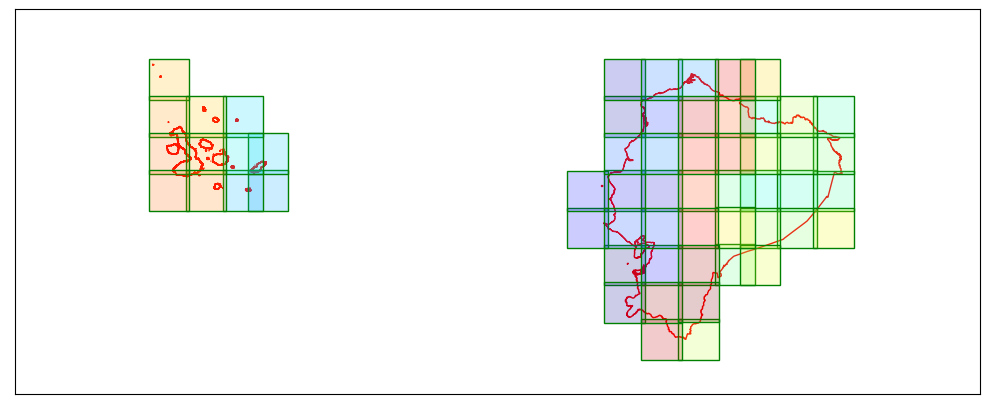

In [283]:
show_splitter(tile_splitter)

In [213]:
type(tile_splitter)


sentinelhub.areas.TileSplitter

In [ ]:
### BBox(((-81.00018010938248, -3.7075372323088565), (-80.01238363602222, -2.713768419181371)), crs=CRS('4326'))

In [ ]:
### BBox(((-92.10136127555407, -0.08847177100919486), (-91.11468945030023, 0.9044184972737761)), crs=CRS('4326'))

In [215]:
bbox_grid = [BBox((x, y, x + 1, y + 1), CRS.WGS84) for x, y in itertools.product(range(-93, -90), range(-1, 1))]

bbox_grid

[BBox(((-93.0, -1.0), (-92.0, 0.0)), crs=CRS('4326')),
 BBox(((-93.0, 0.0), (-92.0, 1.0)), crs=CRS('4326')),
 BBox(((-92.0, -1.0), (-91.0, 0.0)), crs=CRS('4326')),
 BBox(((-92.0, 0.0), (-91.0, 1.0)), crs=CRS('4326')),
 BBox(((-91.0, -1.0), (-90.0, 0.0)), crs=CRS('4326')),
 BBox(((-91.0, 0.0), (-90.0, 1.0)), crs=CRS('4326'))]

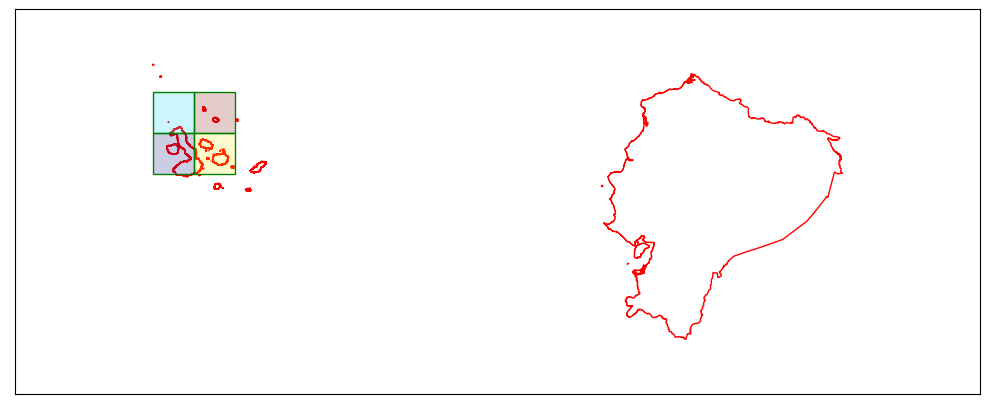

In [314]:
custom_grid_splitter = CustomGridSplitter([ecuador_area], CRS.WGS84, bbox_grid)

show_splitter(custom_grid_splitter)

In [317]:
custom_grid_splitter

## UTM grid zones

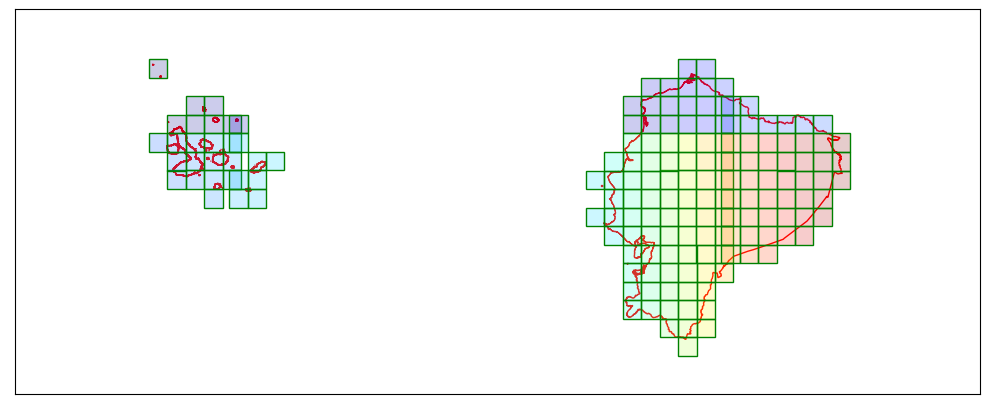

In [323]:
utm_grid_splitter = UtmGridSplitter([ecuador_area], CRS.WGS84, (50000, 50000))

show_splitter(utm_grid_splitter)

## Landscope by Province 

In [491]:
ecu_shapefile

id                            name  density  \
0   11192                           Azuay        0   
1   11186                         Bolívar        0   
2   11191                           Cañar        0   
3   11178                          Carchi        0   
4   11188                      Chimborazo        0   
5   11196                        Cotopaxi        0   
6   11182                          El Oro        0   
7   11194                      Esmeraldas        0   
8   11176              Galápagos Province        0   
9   11190                          Guayas        0   
10  11179                        Imbabura        0   
11  11177                            Loja        0   
12  11195                        Los Ríos        0   
13  11193                          Manabí        0   
14  11199                 Morona Santiago        0   
15  11184                            Napo        0   
16  11183                        Orellana        0   
17  11185                         Pastaza        0   
18  11187                       Pichincha        0   
19  11189            Santa Elena Province        0   
20  11197  Santo Domingo de los Tsáchilas        0   
21  11181                       Sucumbíos        0   
22  11180                      Tungurahua        0   
23  11198                Zamora Chinchipe        0   

                                             path  \
0                            /world/Ecuador/Azuay   
1                          /world/Ecuador/Bolívar   
2                            /world/Ecuador/Cañar   
3                           /world/Ecuador/Carchi   
4                       /world/Ecuador/Chimborazo   
5                         /world/Ecuador/Cotopaxi   
6                           /world/Ecuador/El Oro   
7                       /world/Ecuador/Esmeraldas   
8               /world/Ecuador/Galápagos Province   
9                           /world/Ecuador/Guayas   
10                        /world/Ecuador/Imbabura   
11                            /world/Ecuador/Loja   
12                        /world/Ecuador/Los Ríos   
13                          /world/Ecuador/Manabí   
14                 /world/Ecuador/Morona Santiago   
15                            /world/Ecuador/Napo   
16                        /world/Ecuador/Orellana   
17                         /world/Ecuador/Pastaza   
18                       /world/Ecuador/Pichincha   
19            /world/Ecuador/Santa Elena Province   
20  /world/Ecuador/Santo Domingo de los Tsáchilas   
21                       /world/Ecuador/Sucumbíos   
22                      /world/Ecuador/Tungurahua   
23                /world/Ecuador/Zamora Chinchipe   

                                             geometry  
0   MULTIPOLYGON (((-78.42359 -2.63094, -78.42438 ...  
1   MULTIPOLYGON (((-78.84405 -1.66148, -78.84527 ...  
2   MULTIPOLYGON (((-78.56794 -2.55694, -78.56992 ...  
3   MULTIPOLYGON (((-77.52777 0.64174, -77.53217 0...  
4   MULTIPOLYGON (((-78.35854 -1.52093, -78.35925 ...  
5   MULTIPOLYGON (((-78.38093 -0.81640, -78.38172 ...  
6   MULTIPOLYGON (((-79.36539 -3.65916, -79.36701 ...  
7   MULTIPOLYGON (((-78.42754 0.58121, -78.42919 0...  
8   MULTIPOLYGON (((-89.03787 -0.71827, -89.03887 ...  
9   MULTIPOLYGON (((-79.10294 -2.13389, -79.10343 ...  
10  MULTIPOLYGON (((-77.81157 0.35502, -77.81256 0...  
11  MULTIPOLYGON (((-79.10069 -4.20876, -79.10198 ...  
12  MULTIPOLYGON (((-79.08156 -0.56474, -79.08243 ...  
13  MULTIPOLYGON (((-79.40194 -0.39157, -79.40259 ...  
14  MULTIPOLYGON (((-76.69277 -2.60895, -76.86411 ...  
15  MULTIPOLYGON (((-77.02701 -0.92207, -77.02727 ...  
16  MULTIPOLYGON (((-75.19496 -0.97038, -75.22002 ...  
17  MULTIPOLYGON (((-75.58499 -1.54962, -75.58667 ...  
18  MULTIPOLYGON (((-77.83986 0.02749, -77.84066 0...  
19  MULTIPOLYGON (((-80.22824 -2.22519, -80.22881 ...  
20  MULTIPOLYGON (((-78.74813 -0.27094, -78.74869 ...  
21  MULTIPOLYGON (((-75.22298 -0.62826, -75.22325 ...  
22  MULTIPOLYGON (((-78.11305 -1.28466, -7

In [494]:
INPUT_FILE = "ecutest.json"

geo_json = read_data(INPUT_FILE)
ecuador_area = shape(geo_json["features"][5]["geometry"])

type(ecuador_area)

shapely.geometry.multipolygon.MultiPolygon

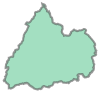

In [495]:
ecuador_area

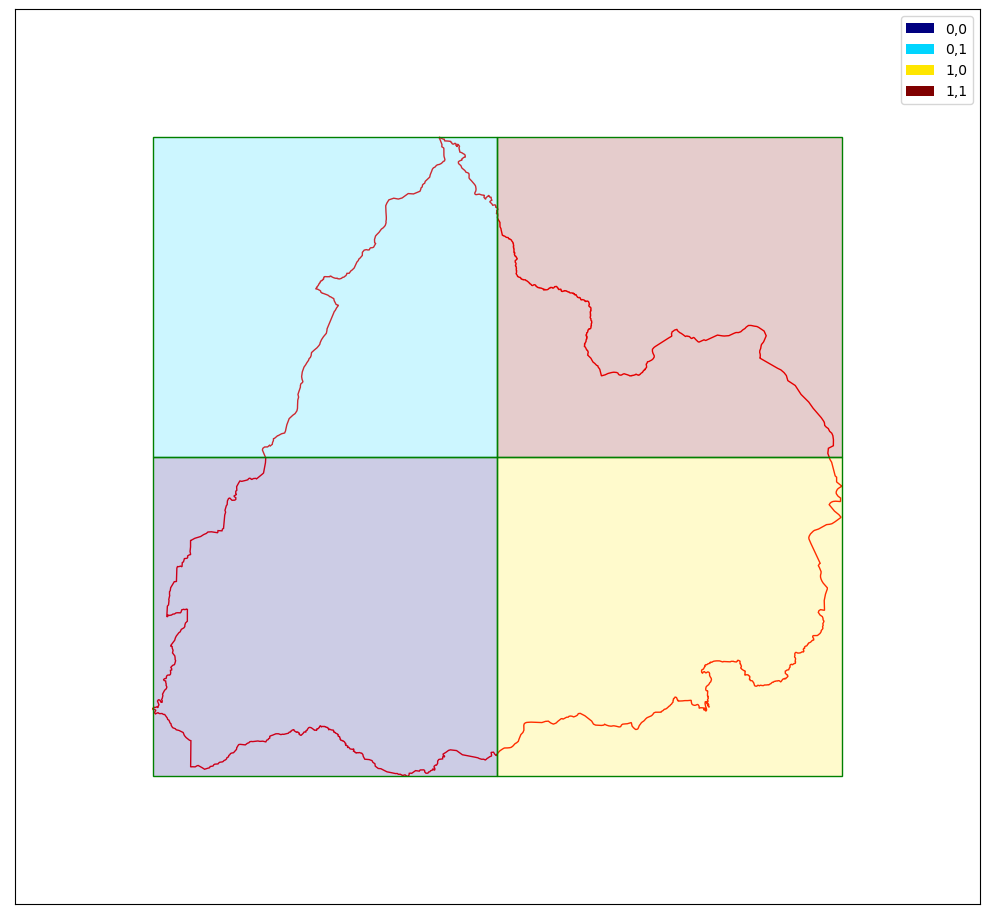

In [506]:
first = ecuador_area.geoms[0]
first_split = BBoxSplitter([first], CRS.WGS84, (2,2))
show_splitter(first_split, show_legend=True)

In [356]:
ndvi_eval = """
//VERSION=3

function evaluatePixel(samples) {
    let val = index(samples.B08, samples.B04);
    return [val];
}

function setup() {
  return {
    input: [{
      bands: [
        "B04",
        "B08",
        "dataMask"
      ]
    }],
    output: {
      bands: 1
    }
  }
}
"""

In [517]:
evalscript_true_color = """
//VERSION=3

function setup() {
    return {
        input: [{
            bands: ["B02", "B03", "B04"]
        }],
        output: {
            bands: 3
        }
    };
}

function evaluatePixel(sample) {
    return [sample.B04, sample.B03, sample.B02];
}
"""

In [518]:
def get_subarea(bbox):
    return SentinelHubRequest(
        evalscript=evalscript_true_color,
        input_data=[
            SentinelHubRequest.input_data(
                data_collection=DataCollection.SENTINEL2_L2A,
                time_interval=("2023-01-01", "2023-01-15"),
                mosaicking_order=MosaickingOrder.LEAST_CC,
            )
        ],
        responses=[SentinelHubRequest.output_response("default", MimeType.TIFF)],
        bbox=bbox,
        size=(1250, 1250),
        data_folder=tempfile.gettempdir(),
        config=config,
    )

In [519]:
# create a list of requests
bbox_list = first_split.get_bbox_list()
sh_requests = [get_subarea(bbox) for bbox in bbox_list]
dl_requests = [request.download_list[0] for request in sh_requests]

# download data with multiple threads
downloaded_data = SentinelHubDownloadClient(config=config).download(dl_requests, max_threads=5)

In [520]:
data_folder = sh_requests[0].data_folder
tiffs = [Path(data_folder) / req.get_filename_list()[0] for req in sh_requests]

In [521]:
def plot_xr_and_bboxes(data_array, geo_vector=None):
    fig, ax = plt.subplots(figsize=(10, 10))
    data_array.plot(ax=ax)
    ax.set_ylabel("Latitude")
    ax.set_xlabel("Longitude")
    ax.set_aspect(1)
    if geo_vector is not None:
        geo_vector.plot(ax=ax, edgecolor="red", facecolor="none")
    plt.show()

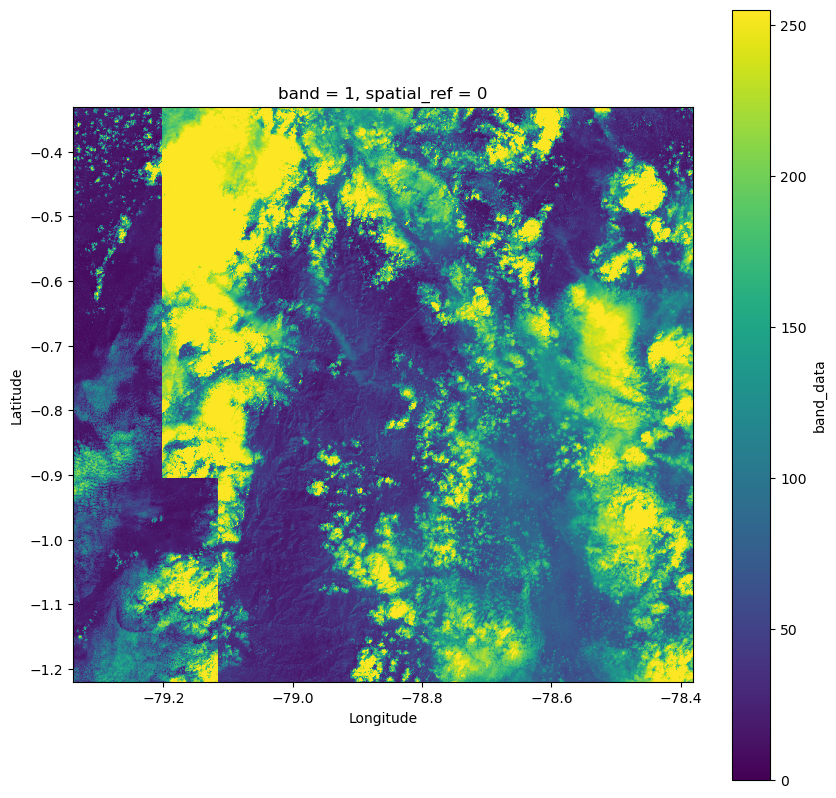

In [522]:
composed_tiff = xr.open_mfdataset(tiffs, engine="rasterio")
composed_map = composed_tiff.band_data.isel(band=0)

plot_xr_and_bboxes(composed_map)

## CNN with data obtained in Notebook#2

In [6]:
from skimage.io import imread
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [7]:
images = {'C:\\Users\\Erick\\Downloads\\Thesis Master\\sentinel\\dataset\\carihuairazo2021.png': 'No eruption',
    'C:\\Users\\Erick\\Downloads\\Thesis Master\\sentinel\\dataset\\wolf2021.png': 'No eruption',
    'C:\\Users\\Erick\\Downloads\\Thesis Master\\sentinel\\dataset\\cotopaxi2021.png': 'No eruption',
    'C:\\Users\\Erick\\Downloads\\Thesis Master\\sentinel\\dataset\\quilotoa2021.png': 'No eruption',
    'C:\\Users\\Erick\\Downloads\\Thesis Master\\sentinel\\dataset\\iliniza2021.png': 'No eruption',
    'C:\\Users\\Erick\\Downloads\\Thesis Master\\sentinel\\dataset\\chimborazo2021.png': 'No eruption',
    'C:\\Users\\Erick\\Downloads\\Thesis Master\\sentinel\\dataset\\wolf11.png': 'Eruption',
    'C:\\Users\\Erick\\Downloads\\Thesis Master\\sentinel\\dataset\\wolf25.png': 'Eruption',
    'C:\\Users\\Erick\\Downloads\\Thesis Master\\sentinel\\dataset\\elaltar2021.png': 'No eruption'}

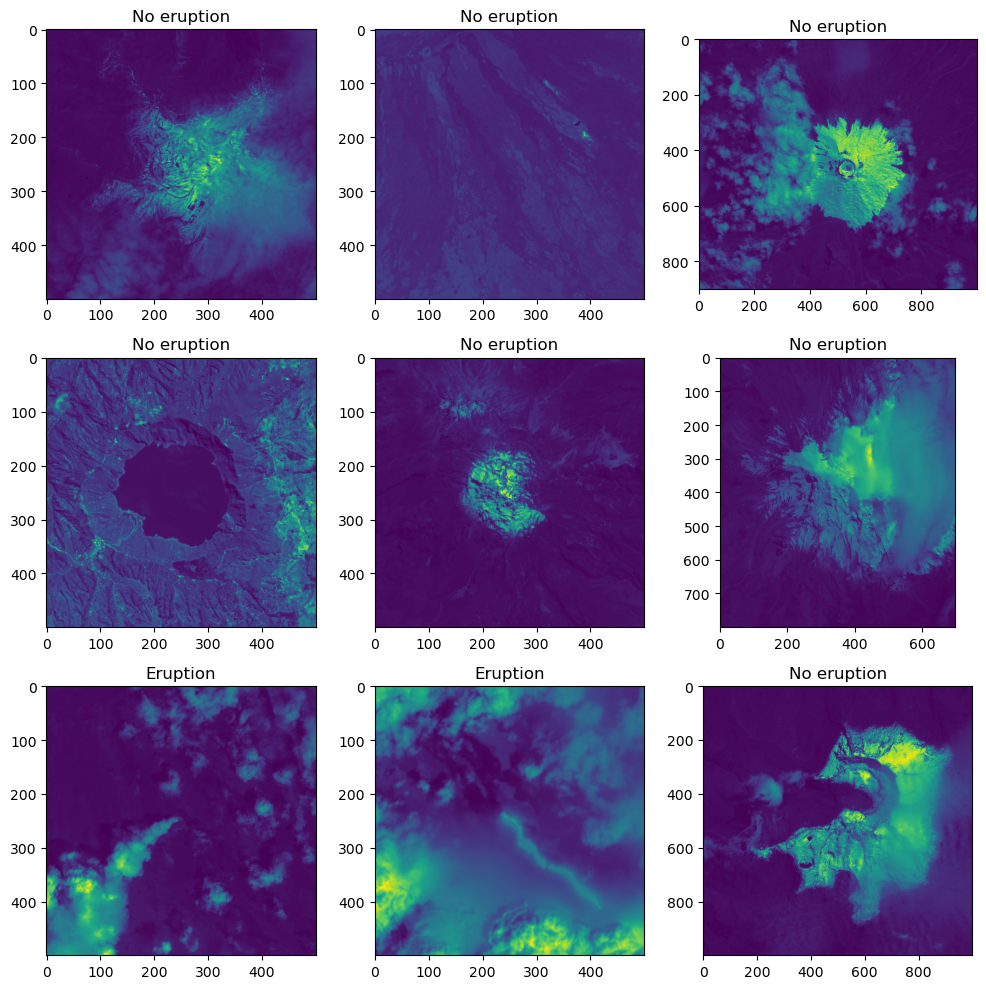

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
axes = axes.flatten()
for i, image in enumerate(images):
  axes[i].imshow(imread(image))
  axes[i].set_title(images[image])
fig.tight_layout()

In [9]:
def scale_image(image):
  resized = resize(image, (224,224), anti_aliasing=True, preserve_range=True)
  resized = 2.*resized/255.-1.
  return resized

In [10]:
batch_size = 16
train_path = 'C:\\Users\\Erick\\Downloads\\Thesis Master\\cnndataset\\training\\{label}\\*.png'
val_path = 'C:\\Users\\Erick\\Downloads\\Thesis Master\\cnndataset\\training\\validation\\{label}\\*.png'
#train_path = '/content/drive/My Drive/volcanoes_detection/training_dataset_color_corr'
#val_path = '/content/drive/My Drive/volcanoes_detection/validation_dataset_color_corr'
test_path = ''
target_size = (224,224)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage.transform import resize

In [12]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, MaxPool2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

In [13]:
import tensorflow.keras.backend as K
dtype='float16'
K.set_floatx(dtype)
# default is 1e-7 which is too small for float16.  Without adjusting the epsilon, we will get NaN predictions because of divide by zero problems
K.set_epsilon(1e-4)

In [14]:
datagen = ImageDataGenerator(
    #rescale = 2./255,
    preprocessing_function = scale_image,
    rotation_range = 45,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'reflect'
    
)

In [15]:
val_datagen = ImageDataGenerator(
    preprocessing_function = scale_image
)
     

In [1]:
from ai4eo.preprocessing import ImageLoader

ModuleNotFoundError: No module named 'ai4eo'